In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Erdos Reyni, N=50000, alpha=15, experiment on beta.csv', index_col=0)
#df = pd.read_csv('M_t_50000_10_0.8.csv', index_col=0)
returns = np.log(np.abs(df)/np.abs(df.shift(1)))

/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

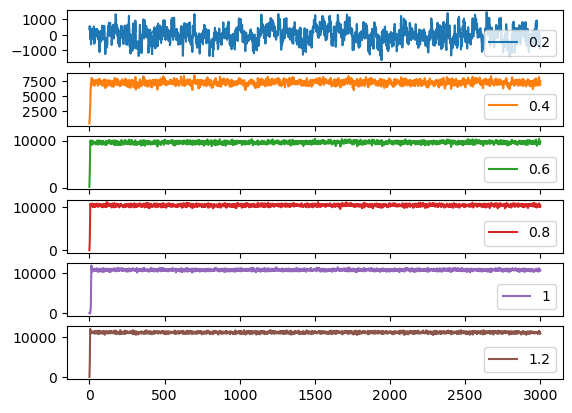

In [5]:
df.plot(subplots=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

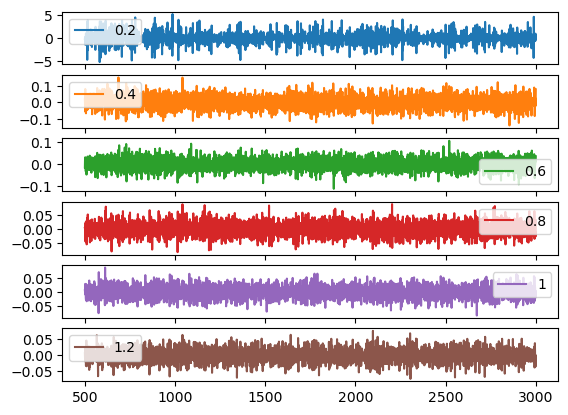

In [6]:
returns[500:].plot(subplots=True)

In [8]:
def calculate_hurst(time_series):
    N = len(time_series)
    lags = [n for n in range(1, N-1)]
    sigma_dma = []
    for n in lags:
        dma = time_series.rolling(n).sum().to_numpy()
        series = time_series.to_numpy()
        sigma = np.sqrt(np.sum(np.square(series[n-1:] - dma[n-1:])) / (N - n))
        sigma_dma.append(sigma)
    
    print(lags)
    print(sigma_dma)

    m = np.polyfit(np.log(lags[1:]), np.log(sigma_dma[1:]), 1)
    plt.loglog(lags[1:], sigma_dma[1:], marker='.', linestyle='none',)
    hurst_exponent = m[0]
    
    return hurst_exponent

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

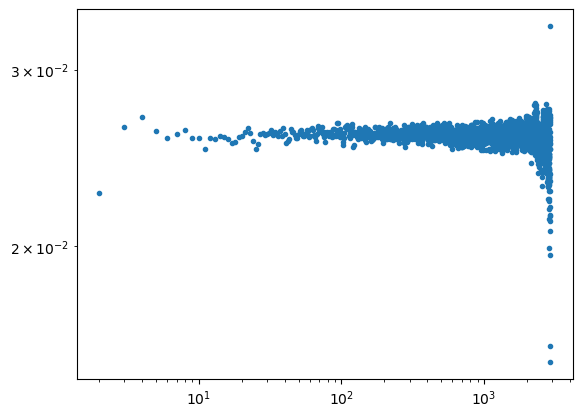

In [15]:
hurst = calculate_hurst(returns['1'][100:])
print(hurst)